In [20]:
import pandas as pd
import numpy as np
from scipy.stats import skew 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
advert = pd.read_csv('Advertising.csv')
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [22]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [25]:
x = advert[['TV','radio','newspaper']]
y = advert.sales

In [26]:
from sklearn.linear_model import LinearRegression 
lin1 = LinearRegression().fit(x,y) 

In [27]:
print("inter",lin1.intercept_)
print("coef",lin1.coef_)

inter 2.938889369459412
coef [ 0.04576465  0.18853002 -0.00103749]


In [28]:
list(zip(['TV','radio','newspaper'],lin1.coef_))

[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820448),
 ('newspaper', -0.0010374930424763285)]

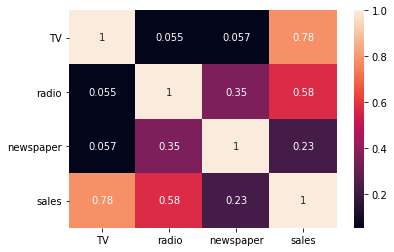

In [29]:
sns.heatmap(advert.corr(),annot=True)

In [30]:
from sklearn.metrics import r2_score
lin2 = LinearRegression().fit(x[['TV','radio']],y)
lin2_pred = lin2.predict(x[['TV','radio']])
print(r2_score(y,lin2_pred))

0.8971942610828957


In [31]:
lin3 = LinearRegression().fit(x[['TV','radio','newspaper']],y)
lin3_pred = lin3.predict(x[['TV','radio','newspaper']])
print(r2_score(y,lin3_pred))

0.8972106381789522


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = advert[['TV','radio','newspaper']]
y = advert.sales
X_train , X_test ,y_train ,y_test= train_test_split(X,y,random_state=0)


In [33]:
lin4 = LinearRegression().fit(X_train,y_train)
lin4_pred =lin4.predict(X_test)
print("MES",np.sqrt(mean_squared_error(y_test,lin4_pred)))
print("R2",r2_score(y_test,lin4_pred))

MES 2.0031219440955406
R2 0.8576396745320893


In [34]:
X = advert[['TV','radio']]
y = advert.sales
X_train , X_test ,y_train ,y_test= train_test_split(X,y,random_state=0)

In [35]:
lin5 = LinearRegression().fit(X_train,y_train)
lin5_pred =lin5.predict(X_test)
print("MES",np.sqrt(mean_squared_error(y_test,lin5_pred)))
print("R2",r2_score(y_test,lin5_pred))

MES 1.9999631665562612
R2 0.8580883042722335


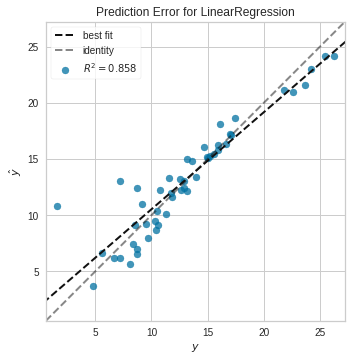

In [36]:
from yellowbrick.regressor import PredictionError,ResidualsPlot

vis = PredictionError(lin5).fit(X_train,y_train)
vis.score(X_test,y_test)
vis.poof()

Interaction Effect (Synergy) in Regression Analysis

In [38]:
advert['interaction'] = advert['TV'] * advert['radio']
X = advert[['TV','radio','interaction']]
y =advert.sales
X_train , X_test ,y_train ,y_test= train_test_split(X,y,random_state=1)
lin6 = LinearRegression().fit(X_train,y_train)
lin6_pred =lin6.predict(X_test)
print("MES",np.sqrt(mean_squared_error(y_test,lin6_pred)))
print("R2",r2_score(y_test,lin6_pred))

MES 0.7011871137164328
R2 0.978973681468126


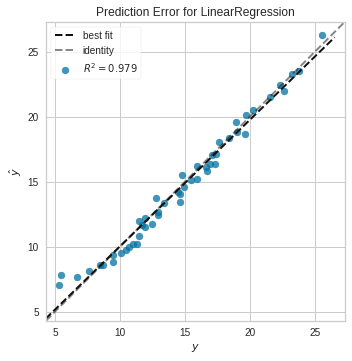

In [39]:
from yellowbrick.regressor import PredictionError,ResidualsPlot
vis2 = PredictionError(lin6).fit(X_train,y_train)
vis2.score(X_test,y_test)
vis2.poof()